In [229]:
# import necessary library and functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
from sklearn.feature_selection import f_regression
from xgboost import XGBRegressor

In [230]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [303]:
data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

# Data description

#### Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [304]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [305]:
data.shape

(8693, 14)

In [306]:
data[['group', 'pp_number']] = data['PassengerId'].str.split('_', expand=True)

In [307]:
data[['deck', 'deck_num', "deck_side"]] = data['Cabin'].str.split('/', expand=True)

In [308]:
# Binning age into different groups
def getAgeGroup(age):
    if age < 18:
        return 'Child'
    elif age < 30:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

data['age_group'] = data['Age'].apply(getAgeGroup)


In [309]:
data = data.apply(lambda x: x.fillna(x.mode()[0]))

In [310]:
# data = data.dropna()

In [311]:
data['HomePlanet'] = data['HomePlanet'].astype('category').cat.codes + 1
data['CryoSleep'] = data['CryoSleep'].astype('category').cat.codes + 1
data['Destination'] = data['Destination'].astype('category').cat.codes + 1
data['VIP'] = data['VIP'].astype('category').cat.codes + 1
data['Name'] = data['Name'].astype('category').cat.codes + 1
data['deck'] = data['deck'].astype('category').cat.codes + 1
data['deck_side'] = data['deck_side'].astype('category').cat.codes + 1
data['age_group'] = data['age_group'].astype('category').cat.codes + 1

In [312]:
# # Apply one-hot encoding using get_dummies to all categorical columns
# data = pd.get_dummies(data, 
#                       columns=["HomePlanet","CryoSleep","Destination","VIP","Name",
#                                "deck","deck_side"],
#                       dtype=int)

In [313]:
data = data.drop(columns=['PassengerId','Cabin','Age'])

In [315]:
data['Transported'] = data['Transported'].replace({True: 1, False: 0})
data['Transported'] = data['Transported'].astype(int)


# Data Exploration

In [298]:
import seaborn as sns

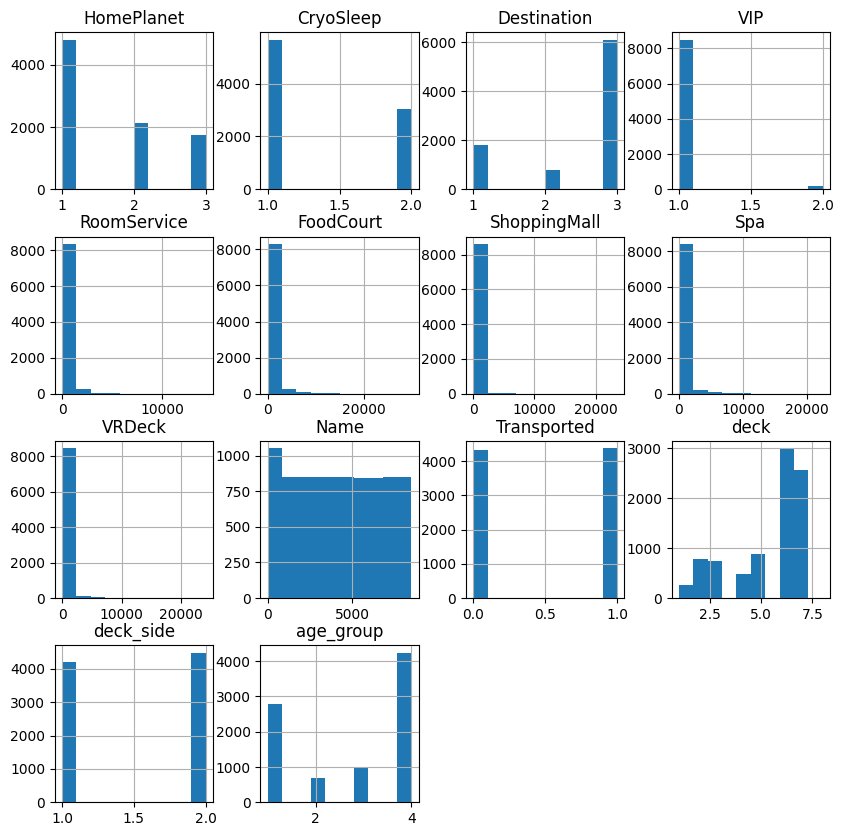

In [291]:
# put some exploratory plots
#create histogram for each column in DataFrame
histogram = data.hist(figsize = (10,10))

# Save the histogram plot as an image file (e.g., PNG)
plt.savefig('histogram.png')

<Axes: xlabel='age_group', ylabel='count'>

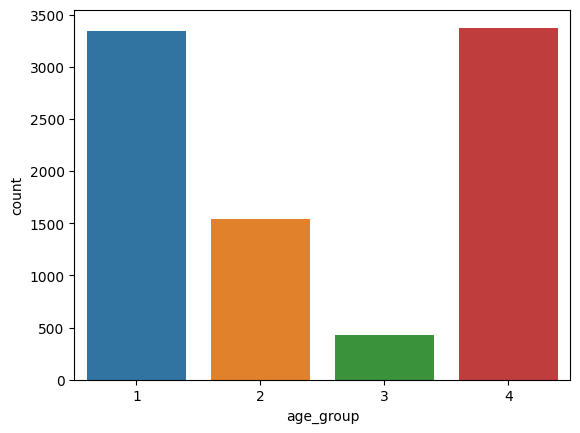

In [316]:
# Explore individual variable
sns.countplot(x = data["age_group"], data = data)

# Dataset preparation

In [317]:
# 1. Divide dataframe into input and output
x = data.drop(columns=['Transported']) # Drop the column to be predicted
y = data['Transported'] # Choose Output column to be predicted
feature_names = x.columns

# Scalling dataset

In [318]:
# scaling the data
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
x = scaler.fit_transform(x)

# Spliting dataset to train and evaluation set

In [319]:
# spliting dataset for training and evaluartion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Multiple model evaluation

In [320]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd


# Define classification models
models = []
models.append(("SVC", SVC()))
models.append(("LogisticRegression", LogisticRegression()))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))
models.append(("SGDClassifier", SGDClassifier()))
models.append(("GaussianNB", GaussianNB()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("XGBClassifier", XGBClassifier()))

# Evaluate each classification model
results = []
names = []
table = []

# Loop to fit each model and evaluate
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    results.append((accuracy, confusion))
    names.append(name)
    table.append((name, accuracy, confusion))

# Display results as a table
pd.options.display.float_format = '{:.4f}'.format
results = pd.DataFrame(table, columns=['Model', 'Accuracy', 'Confusion Matrix'])
results


,Model,Accuracy,Confusion Matrix
0,SVC,0.7930,"[[662, 177], [183, 717]]"
1,LogisticRegression,0.7890,"[[646, 193], [174, 726]]"
2,KNeighborsClassifier,0.7516,"[[640, 199], [233, 667]]"
3,SGDClassifier,0.7895,"[[667, 172], [194, 706]]"
4,GaussianNB,0.7096,"[[400, 439], [66, 834]]"
5,DecisionTreeClassifier,0.7470,"[[635, 204], [236, 664]]"
6,GradientBoostingClassifier,0.8062,"[[651, 188], [149, 751]]"
7,RandomForestClassifier,0.8010,"[[708, 131], [215, 685]]"
8,XGBClassifier,0.7970,"[[678, 161], [192, 708]]"


# Base model defining and evaluation

In [322]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:-",accuracy)

Accuracy:- 0.79700977573318


# Feature Selection

In [325]:
# display the best selected features using mutual_info_regression
x_f = SelectPercentile(f_regression, percentile=70).fit(x_train, y_train)
selected_features_mask = x_f.get_support()
selected_features = feature_names[selected_features_mask].tolist()
print("Selected Features:", selected_features)

Selected Features: ['HomePlanet', 'CryoSleep', 'Destination', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'pp_number', 'deck', 'deck_num', 'deck_side']


In [326]:
# subset the dataset using selected features
x_f = SelectPercentile(f_regression, percentile=70 ).fit_transform(x_train, y_train)

In [327]:
x_test_sub = x_test[selected_features]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [324]:
model = XGBClassifier()
model.fit(x_f, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:-",accuracy)

ValueError: Feature shape mismatch, expected: 9, got 16

# Hyperparameter tuning

In [276]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Define the XGBoost classifier
xgb_model = XGBClassifier()

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new XGBoost classifier with the best parameters
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

# Make predictions and evaluate the model
y_pred = best_xgb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy on Test Set:", accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.8004026459591601
Accuracy on Test Set: 0.8062104657849338


In [275]:
# # Define the RandomForestClassifier
# rf_model = RandomForestClassifier(random_state=42)

# # Define the hyperparameters grid for GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Train a new RandomForestClassifier with the best parameters
# best_rf_model = RandomForestClassifier(**best_params, random_state=42)
# best_rf_model.fit(x_train, y_train)

# # Make predictions and evaluate the model
# y_pred = best_rf_model.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)
# print("Accuracy on Test Set:", accuracy)


Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.7345064927196367
Accuracy on Test Set: 0.7998849913743531


# Submission code and output

In [277]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test[['group', 'pp_number']] = test['PassengerId'].str.split('_', expand=True)
test[['deck', 'deck_num', "deck_side"]] = test['Cabin'].str.split('/', expand=True)
test['age_group'] = test['Age'].apply(getAgeGroup)
test = test.apply(lambda x: x.fillna(x.mode()[0]))
test['HomePlanet'] = test['HomePlanet'].astype('category').cat.codes + 1
test['CryoSleep'] = test['CryoSleep'].astype('category').cat.codes + 1
test['Destination'] = test['Destination'].astype('category').cat.codes + 1
test['VIP'] = test['VIP'].astype('category').cat.codes + 1
test['Name'] = test['Name'].astype('category').cat.codes + 1
test['deck'] = test['deck'].astype('category').cat.codes + 1
test['deck_side'] = test['deck_side'].astype('category').cat.codes + 1
test['age_group'] = test['age_group'].astype('category').cat.codes + 1
test1 = test.drop(columns=['PassengerId','Cabin','Age'])
scaler = StandardScaler()
test1 = scaler.fit_transform(test1)
pred = best_xgb_model.predict(test1)
# 5. Save results to CSV
submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported' : pred})
submission['Transported'] = submission['Transported'].replace({1: True, 0: False})
submission.to_csv('output_submission7.csv', index=False)


<Axes: xlabel='age_group', ylabel='count'>

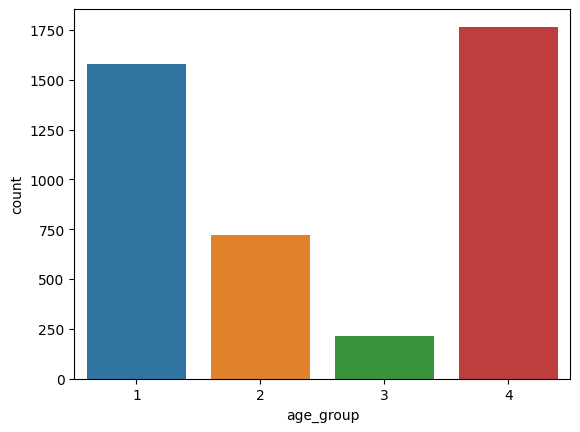

In [302]:
sns.countplot(x = test["age_group"], data = test)